# This notebook allows you to inspect the model predictions interactively

In [181]:
from datamodule import MNISTDataModule
from trainer import LitModel
import munch
import yaml
import matplotlib.pyplot as plt
import json
import torch
import torchvision

checkpoint_path = "PATH_TO_WEIGHTS_HERE" # The path to the trained weights (by default in the /checkpoints folder)
device = "cuda"
labels = json.load(open("cifar100_labels.json"))
config = munch.munchify(yaml.load(open("config.yaml"), Loader=yaml.FullLoader))

# Load model from checkpoint and set it to eval mode
model = LitModel.load_from_checkpoint("PATH_TO_WEIGHTS_HERE", config=config)
model.eval()

# Load the data from the datamodule
dm = MNISTDataModule(batch_size=1)

# Makes a iterable dataloader 
test_dl = dm.test_dataloader()
iter_dl = iter(test_dl)

/opt/homebrew/Caskroom/miniconda/base/envs/tdt4265/lib/python3.10/site-packages/pytorch_lightning/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.4.0, which is newer than your current Lightning version: v2.2.1


In [182]:
class UnNormalize(torchvision.transforms.Normalize):
    """
    Inverse normalization, usefull when visualizing an image with original colors.
    """
    def __init__(self,mean,std,*args,**kwargs):
        new_mean = [-m/s for m,s in zip(mean,std)]
        new_std = [1/s for s in std]
        super().__init__(new_mean, new_std, *args, **kwargs)

mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]

# Visualize predictions 
(re-run the block to get next image)

Text(0.5, 1.0, 'GT: orchid, Pred: orchid(100.0%)')

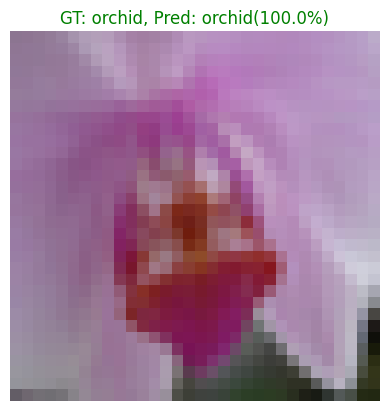

In [265]:
batch = next(iter_dl) # Load next sample
x, y = batch
x, y = x.to(device), y.to(device)


logits = model(x) # Perform model prediction
probs = torch.round(torch.softmax(logits, dim=1)[0] * 100) # Calculates the probabilities for the classes in %
pred = torch.argmax(logits)

orig_x = UnNormalize(mean, std)(x)
plt.axis('off')
plt.imshow(orig_x[0].cpu().permute(1,2,0)) # plt expects [H, W, C] but the data is in [C, H, W]
plt.title(f"GT: {labels[y]}, Pred: {labels[pred]}({probs[pred]}%)", color="green" if y == pred else "red")